# Section 1: Decision Trees I

## Exercise 1.1: Classification with a Decision Tree


**Objective:**  
Implement a decision tree classifier using the scikit-learn library and apply it to a classification dataset, such as the Iris dataset. Evaluate the model’s performance using cross-validation and various metrics (accuracy, precision, recall, etc.).

**Instructions:**
1. Load the Iris dataset and preprocess the data.
2. Split the dataset into training and testing sets.
3. Train a Decision Tree classifier and evaluate its performance.
4. Experiment with different max depth values and observe the changes in model performance.

**Deliverables:**
- Jupyter notebook or Python script with code and comments.
- Performance evaluation table with metrics (accuracy, precision, recall) for different max depth values.
- Visualizations, if applicable (e.g., confusion matrix, decision tree plot).

Importing needed libraries and defining functions to se later:

In [51]:
import pandas as pd
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score
import numpy as np

def show_confusion_matrix(y_test, y_pred, depth):
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Depth: ' + str(depth))
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(range(len(set(y_test))), set(y_test))
    plt.yticks(range(len(set(y_test))), set(y_test))
    plt.show()

We load the Iris dataset, and we split it into training and testing sets:

In [39]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We create a list to store performance metrics and then, for various _max_depth_ we create a Decision Tree classifier and we train on the same set. <br>
We also store a copy of the best tree. This will be used later to visualize.

/usr/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


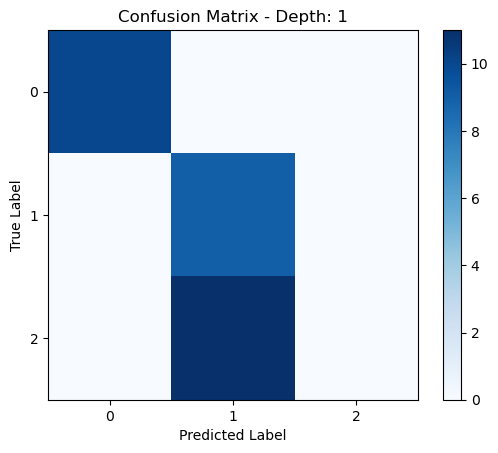

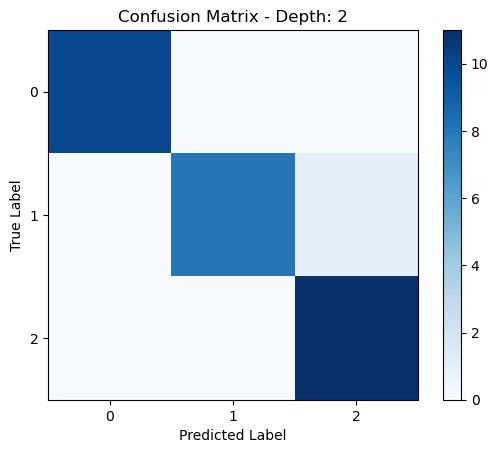

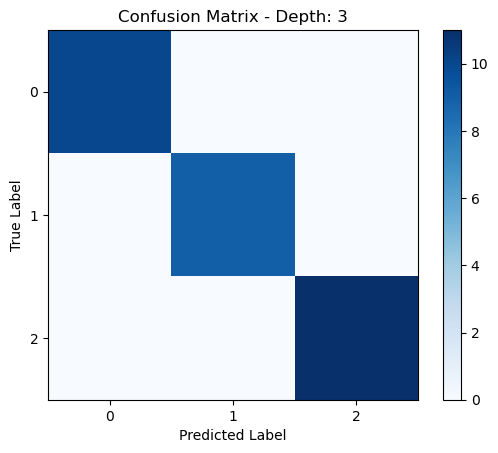

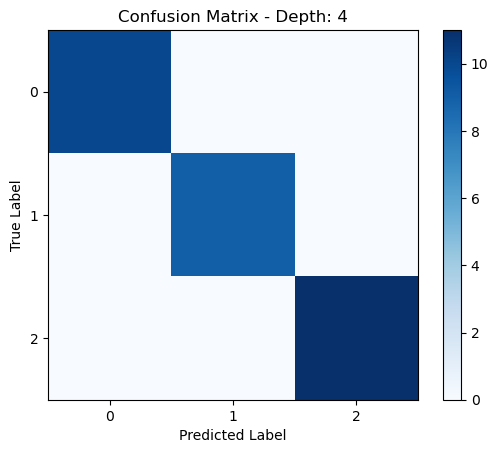

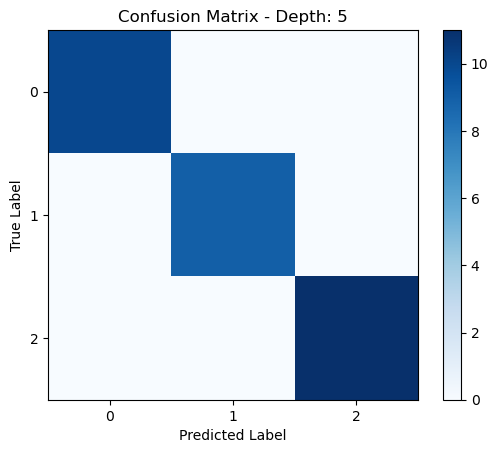

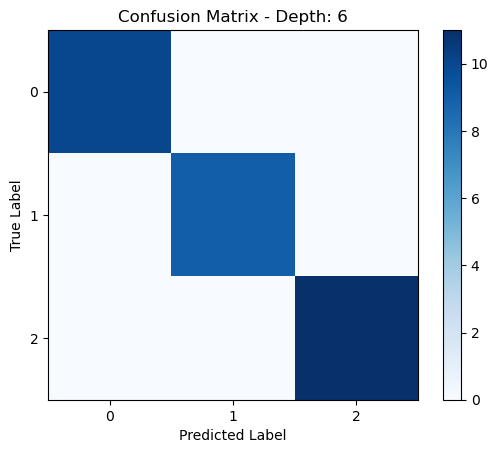

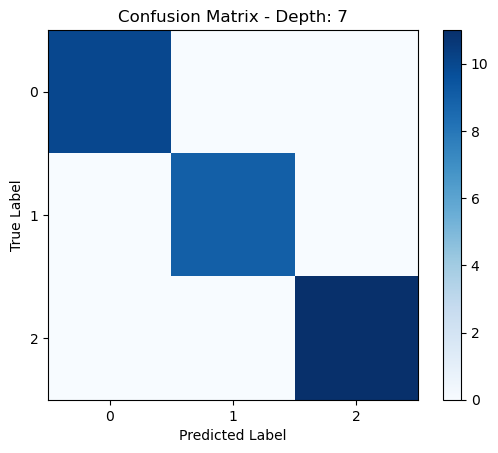

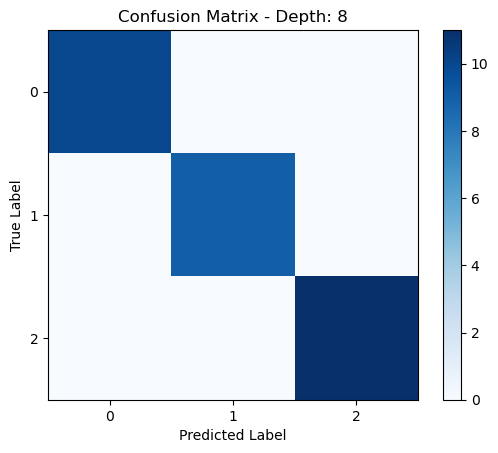

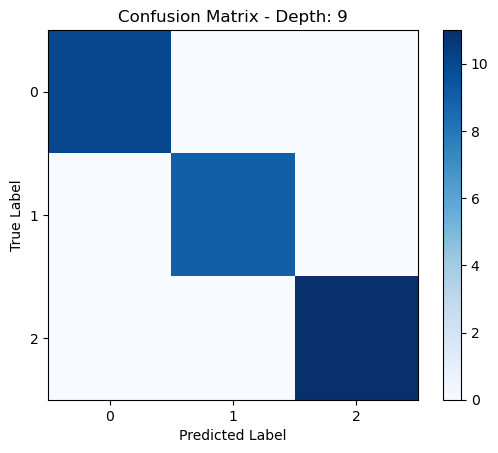

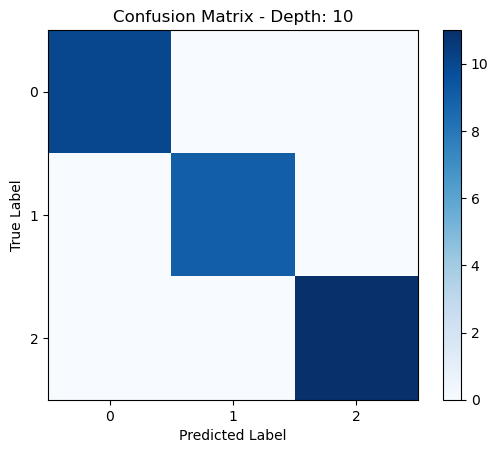

In [33]:
# Create a list to store performance metrics
performance_metrics = []

# Experiment with different max depth values
for depth in range(1, 11):
    # Create a Decision Tree classifier with the specified max depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Train the model on the training set
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division='warn')
    recall = recall_score(y_test, y_pred, average='weighted', zero_division='warn')
    cross_val_accuracy = scores.mean()

    metrics = {
        'max_depth': depth,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'cross_val_accuracy': cross_val_accuracy
    }

    if not any(d == metrics for d in performance_metrics):
        show_confusion_matrix(y_test, y_pred,depth)
    
    # Store the results
    performance_metrics.append(metrics)
    
    if cross_val_accuracy is max(record['cross_val_accuracy'] for record in performance_metrics):
        clf_best = clf
        best_depth = depth
        y_pred_best = y_pred

In [30]:
pd.DataFrame(performance_metrics)

,max_depth,accuracy,precision,recall,cross_val_accuracy
0,1,0.633333,0.468333,0.633333,0.675000
1,2,0.966667,0.969444,0.966667,0.916667
2,3,1.000000,1.000000,1.000000,0.933333
3,4,1.000000,1.000000,1.000000,0.941667
4,5,1.000000,1.000000,1.000000,0.933333
5,6,1.000000,1.000000,1.000000,0.941667
6,7,1.000000,1.000000,1.000000,0.941667
7,8,1.000000,1.000000,1.000000,0.941667
8,9,1.000000,1.000000,1.000000,0.941667
9,10,1.000000,1.000000,1.000000,0.941667


Visualization of the decision tree:

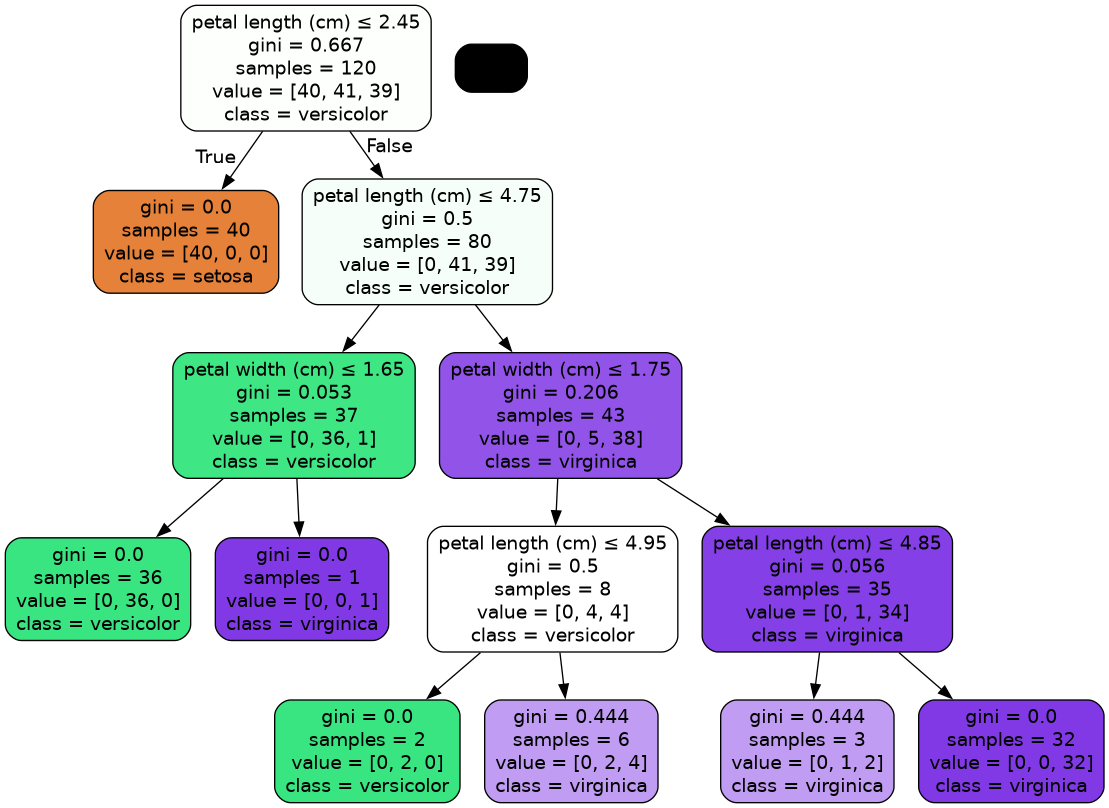

In [54]:
dot_data = tree.export_graphviz(clf_best, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names, 
                                filled=True, 
                                rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())